In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%%sql
SELECT * FROM sqlite_master WHERE type = 'table'

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
%%sql
SELECT * FROM Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
%%sql
SELECT * 
FROM League
JOIN Country 
    ON League.country_id = Country.id

,id,country_id,name,id.1,name.1
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [6]:
%%sql
SELECT * FROM Team ORDER BY team_long_name LIMIT 10

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [23]:
%%sql
SELECT
    League.name as league_name,
    Country.name as country_name,
    Team.team_long_name as team_name
FROM League
JOIN Country on League.country_id = Country.id
JOIN Match on League.id = Match.league_id
JOIN Team on Match.home_team_api_id = Team.team_api_id
GROUP BY League.name, Country.name, Team.team_long_name
ORDER BY League.name, Country.name, Team.team_long_name DESC

,league_name,country_name,team_name
0,Belgium Jupiler League,Belgium,Waasland-Beveren
1,Belgium Jupiler League,Belgium,Tubize
2,Belgium Jupiler League,Belgium,Standard de Liège
3,Belgium Jupiler League,Belgium,Sporting Lokeren
4,Belgium Jupiler League,Belgium,Sporting Charleroi
...,...,...,...
291,Switzerland Super League,Switzerland,FC Lausanne-Sports
292,Switzerland Super League,Switzerland,FC Basel
293,Switzerland Super League,Switzerland,FC Aarau
294,Switzerland Super League,Switzerland,BSC Young Boys


In [7]:
%%sql
SELECT 
    Match.id,
    Country.name AS country_name,
    League.name AS league_name,
    season,
    stage,
    date,
    HT.team_long_name AS home_team,
    AT.team_long_name AS away_team,
    home_team_goal,
    away_team_goal
FROM Match
JOIN Country
    ON Country.id = Match.country_id
JOIN League
    ON League.id = Match.league_id
LEFT JOIN Team AS HT
    ON HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT
    ON AT.team_api_id = Match.away_team_api_id
WHERE country_name = 'Spain'
ORDER BY date
LIMIT 10

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [8]:
%%sql
SELECT 
    Country.name AS country_name,
    League.name AS league_name,
    season,
    COUNT(DISTINCT stage) AS number_of_stages,
    COUNT(DISTINCT HT.team_long_name) AS number_of_teams,
    AVG(home_team_goal) AS avg_home_team_goals,
    AVG(away_team_goal) AS avg_away_team_goals,
    AVG(home_team_goal-away_team_goal) AS avg_goal_diff,
    AVG(home_team_goal+away_team_goal) AS avg_goals,
    SUM(home_team_goal + away_team_goal) AS total_goals
FROM Match
JOIN Country
    ON Country.id = Match.country_id
JOIN League
    ON League.id = Match.league_id
LEFT JOIN Team AS HT
    ON HT.team_api_id = Match.home_team_api_id
LEFT JOIN Team AS AT
    ON AT.team_api_id = Match.away_team_api_id
WHERE Country.name IN ('Germany', 'Spain', 'Poland', 'Italy')
GROUP BY Country.name, League.name, season
HAVING COUNT(DISTINCT stage) > 10
ORDER BY Country.name, League.name, season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_goals,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
1,Germany,Germany 1. Bundesliga,2009/2010,34,18,1.513072,1.316993,0.196078,2.830065,866
2,Germany,Germany 1. Bundesliga,2010/2011,34,18,1.647059,1.274510,0.372549,2.921569,894
3,Germany,Germany 1. Bundesliga,2011/2012,34,18,1.660131,1.199346,0.460784,2.859477,875
4,Germany,Germany 1. Bundesliga,2012/2013,34,18,1.591503,1.343137,0.248366,2.934641,898
5,Germany,Germany 1. Bundesliga,2013/2014,34,18,1.748366,1.411765,0.336601,3.160131,967
6,Germany,Germany 1. Bundesliga,2014/2015,34,18,1.588235,1.166667,0.421569,2.754902,843
7,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
8,Italy,Italy Serie A,2008/2009,38,20,1.521053,1.078947,0.442105,2.600000,988
9,Italy,Italy Serie A,2009/2010,38,20,1.542105,1.068421,0.473684,2.610526,992


In [9]:
df_seasons.groupby('country_name')['avg_goals'].mean()

country_name
Germany    2.901552
Italy      2.616622
Poland     2.425000
Spain      2.767105
Name: avg_goals, dtype: float64

<Axes: title={'center': 'Average goals in season per country'}, xlabel='Season', ylabel='Avg goals'>

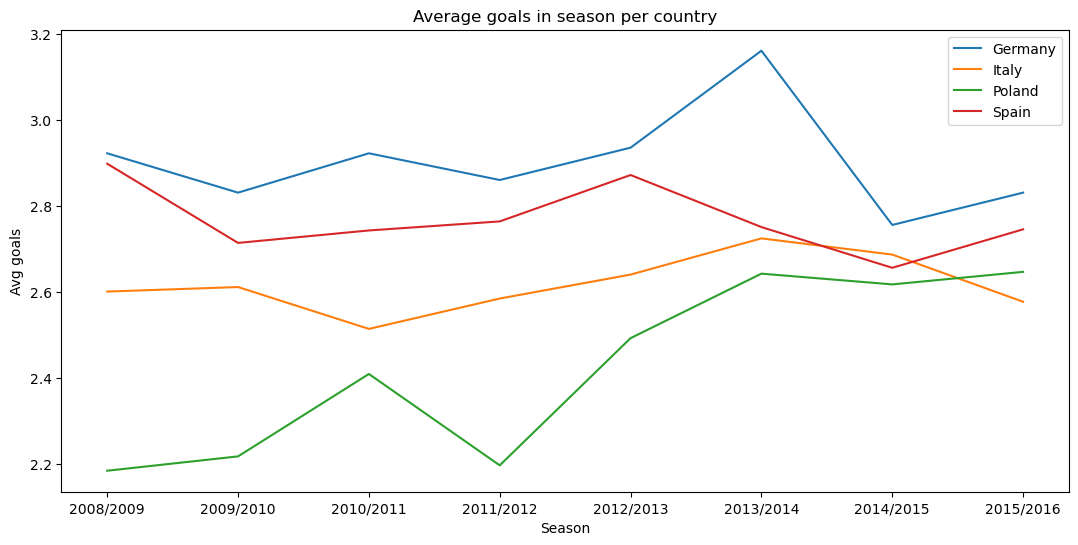

In [10]:
poland = df_seasons.loc[df_seasons['country_name'] == 'Poland']['avg_goals']

germany = df_seasons.loc[df_seasons['country_name'] == 'Germany']['avg_goals']

italy = df_seasons.loc[df_seasons['country_name'] == 'Italy']['avg_goals']

spain = df_seasons.loc[df_seasons['country_name'] == 'Spain']['avg_goals']

df_country_avg = pd.DataFrame(index=np.sort(df_seasons['season'].unique()), columns=df_seasons['country_name'].unique())

df_country_avg.loc[:, 'Poland'] = list(poland)
df_country_avg.loc[:, 'Germany'] = list(germany)
df_country_avg.loc[:, 'Italy'] = list(italy)
df_country_avg.loc[:, 'Spain'] = list(spain)

df_country_avg.plot(figsize=(13,6), title='Average goals in season per country', xlabel="Season", ylabel="Avg goals")

In [14]:
%%sql
SELECT 
    CASE
        WHEN ROUND(height) < 165 THEN 165
        WHEN ROUND(height) > 195 THEN 195
        ELSE ROUND(height)
    END AS calc_height,
    COUNT(height) AS distribution,
    AVG(PA_Grouped.avg_overall_rating) AS avg_overall_rating,
    AVG(PA_Grouped.avg_potential) AS avg_potential,
    AVG(weight) AS avg_weight
FROM Player
LEFT JOIN 
    (
        SELECT
            Player_Attributes.player_api_id,
            AVG(Player_Attributes.overall_rating) AS avg_overall_rating,
            AVG(Player_Attributes.potential) AS avg_potential
        FROM Player_Attributes
        GROUP BY Player_Attributes.player_api_id
    ) AS PA_Grouped
    ON Player.player_api_id = PA_Grouped.player_api_id
GROUP BY calc_height
ORDER BY calc_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165,74,67.365543,73.327754,139.459459
1,168,118,67.500518,73.124182,144.127119
2,170,403,67.726903,73.379056,147.799007
3,173,530,66.980272,72.848746,152.824528
4,175,1188,66.805204,72.258774,156.111953
5,178,1489,66.367212,71.943339,160.665547
6,180,1388,66.419053,71.846394,165.261527
7,183,1954,66.634380,71.754555,170.167861
8,185,1278,66.928964,71.833475,174.636933
9,188,1305,67.094253,72.151949,179.278161


<Axes: title={'center': 'Rating vs Height'}, xlabel='Height', ylabel='Avg Rating'>

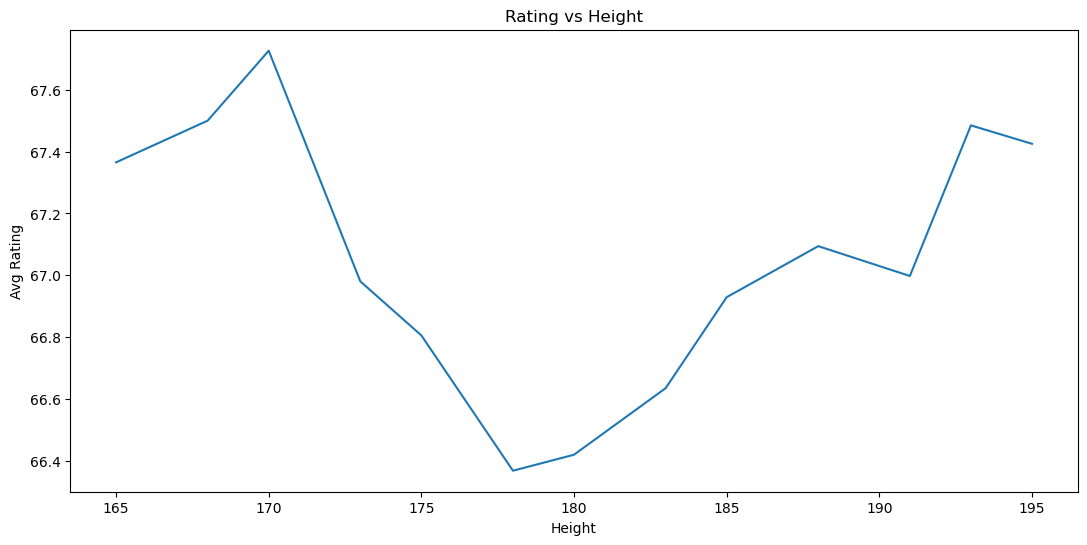

In [20]:
players_height.plot(x='calc_height', y=['avg_overall_rating'], figsize=(13,6), xlabel='Height', ylabel='Avg Rating', title='Rating vs Height', legend=None)